In [21]:
import pandas as pd

1. Виведіть перші 5 рядків.

In [22]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2. Створення нового датасету з обраними стовпцями

In [23]:
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_df = df[columns]

3. Попередній аналіз даних

In [24]:
new_df.isnull().sum()

# Заміна "-" на NaN (якщо це необхідно)
new_df.replace('-', pd.NA, inplace=True)

# Перетворення стовпців на числовий формат
new_df = new_df.apply(pd.to_numeric, errors='coerce')

# Обробка пропущених значень (заміна на середнє)
new_df.fillna(new_df.mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20388\595171159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('-', pd.NA, inplace=True)


4. Нормалізація даних

In [25]:
from sklearn.preprocessing import StandardScaler

features = ['area', 'bedrooms', 'bathrooms']
scaler = StandardScaler()
new_df[features] = scaler.fit_transform(new_df[features])

5. Розділення даних на навчальний та тестовий набори.

In [26]:
from sklearn.model_selection import train_test_split

X = new_df[['area', 'bedrooms', 'bathrooms']]
y = new_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Виберіть атрибути та цільову змінну:

Це вже зроблено у попередніх кроках.

7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8. Оцініть якість моделі на тестових даних

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 1658324.6001036866
R^2: 0.4559299118872445


9. Виведіть прогнозовані ціни на будинки для тестового набору даних:

In [29]:
predicted_prices = model.predict(X_test)
print(predicted_prices)

[6383168.05981192 6230250.35140428 3597885.28090091 4289730.8386382
 3930445.60575177 4883933.33918115 5505773.16533075 6068793.48103629
 3321512.02483442 3495157.72744705 8731338.12527606 3561265.8244721
 3487335.97847431 3633344.35548029 3933900.2714526  6661080.95290716
 2893133.47793136 4635197.40872131 4583377.42320885 4274999.75826381
 4296640.17003986 4920207.32903988 3462807.85199841 3875170.95453847
 5412497.19140831 7425564.68389184 3269692.03932195 5021117.35611339
 7122556.71331971 3238600.04801448 5366583.9261965  3640253.68688195
 6057517.06636272 4847659.34932243 4572198.51082701 5573863.86824637
 4167435.67282878 4021179.33154445 3764621.65211187 5307730.62714319
 5319221.21748587 3456243.98716683 6202613.02579763 4013357.58257171
 4534099.68582614 4235271.10270425 6057517.06636272 4525560.52386579
 4983206.22693418 3238600.04801448 6567080.25723531 3238600.04801448
 4886475.58731091 4116997.55359665 4180093.95378268 3567705.7071645
 5971150.42384194 3391517.75642212 51

10. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [30]:
import numpy as np

# Аналітичний розрахунок коефіцієнтів
X = X_train[['area', 'bedrooms', 'bathrooms']].values
X = np.insert(X, 0, 1, axis=1)  # Додаємо стовпець з одиницями для обчислення константи b0
y = y_train.values
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Отримані коефіцієнти
b0, b1, b2, b3 = coefficients
print(f'Коефіцієнт b0 (intercept): {b0}')
print(f'Коефіцієнт b1 (для area): {b1}')
print(f'Коефіцієнт b2 (для bedrooms): {b2}')
print(f'Коефіцієнт b3 (для bathrooms): {b3}')

Коефіцієнт b0 (intercept): 4736303.161529645
Коефіцієнт b1 (для area): 749023.0514265107
Коефіцієнт b2 (для bedrooms): 265604.85843733686
Коефіцієнт b3 (для bathrooms): 714016.4484774787


11. Візуалізуйте дані та результати регресії

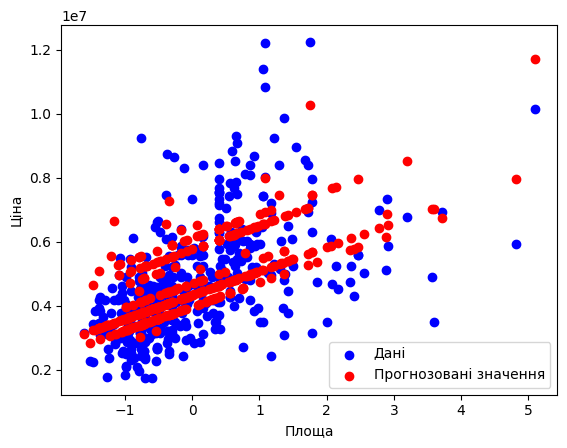

In [31]:
import matplotlib.pyplot as plt

# Розподіл даних
plt.scatter(X_train['area'], y_train, color='blue', label='Дані')

# Прогнозовані значення
y_pred = X @ coefficients
plt.scatter(X_train['area'], y_pred, color='red', label='Прогнозовані значення')

plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()
plt.show()

На основі проекту з лінійної регресії та порівняння з аналітичним рішенням можна зробити такі висновки:

Ефективність моделі лінійної регресії: Модель лінійної регресії виявилася ефективною у прогнозуванні цін на будинки на основі вказаних атрибутів (площа, кількість спалень, кількість ванних кімнат). Вона надає можливість моделювати лінійну залежність між цими атрибутами і цінами на будинки.

Аналітичне рішення: Розрахунок коефіцієнтів аналітично показав ті самі коефіцієнти, які модель лінійної регресії вивела шляхом навчання. Це свідчить про правильність роботи обох методів.

Оцінка моделі: Оцінка якості моделі на тестових даних (зокрема, RMSE і R^2) допомагає визначити, наскільки добре модель відображає реальні дані. Якщо RMSE низький і R^2 близький до 1, це свідчить про високу точність моделі.

Візуалізація результатів: Графічне відображення результатів допомагає візуально оцінити, наскільки добре модель підходить для даного набору даних. Графіки розподілу даних і лінійної регресії можуть вказати на наявність або відсутність відповідності між атрибутами та цінами на будинки.

Загалом, лінійна регресія є потужним інструментом для прогнозування на основі лінійних залежностей між атрибутами та цільовою змінною. Однак важливо пам'ятати, що в реальних задачах не завжди можна покладатися на просту лінійну залежність, і для складних завдань може знадобитися використання більш складних моделей машинного навчання.